<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.7_confidence_intervals/stats_confint_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Confidence intervals
# Bootstrapping confidence intervals

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.patches import Polygon

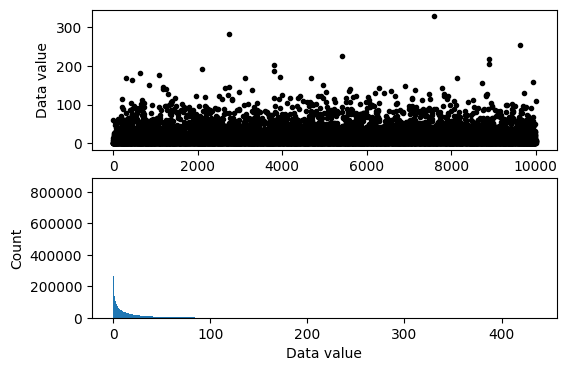

In [2]:
## simulate data

popN = int(1e7)  # lots and LOTS of data!!

# the data (note: non-normal!)
population = (4*np.random.randn(popN))**2

# we can calculate the exact population mean
popMean = np.mean(population)

# let's see it
fig,ax = plt.subplots(2,1,figsize=(6,4))

# only plot every 1000th sample
ax[0].plot(population[::1000],'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value')
plt.show()


In [4]:
## draw a random sample

# parameters
samplesize = 40
confidence = 95 # in percent

# compute sample mean
randSamples = np.random.randint(0,popN,samplesize)
sampledata  = population[randSamples]
samplemean  = np.mean(population[randSamples])
samplestd   = np.std(population[randSamples]) # used later for analytic solution



### now for bootstrapping
numBoots  = 1000
bootmeans = np.zeros(numBoots)

# resample with replacement
for booti in range(numBoots):
    bootmeans[booti] = np.mean( np.random.choice(sampledata,samplesize) )


# find confidence intervals
confint = [0,0] # initialize
confint[0] = np.percentile(bootmeans,(100-confidence)/2)
confint[1] = np.percentile(bootmeans,100-(100-confidence)/2)

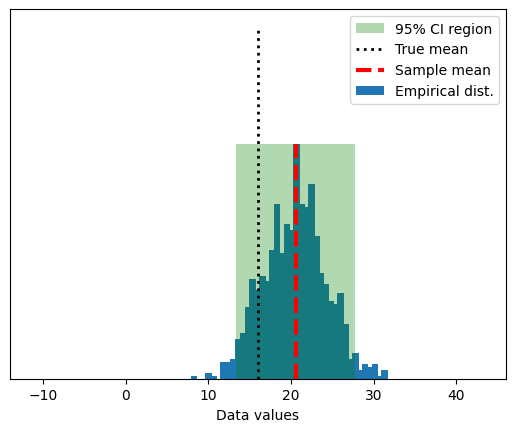

In [5]:
## graph everything
fig,ax = plt.subplots(1,1)

# start with histogram of resampled means
y,x = np.histogram(bootmeans,40)
y = y/max(y)
x = (x[:-1]+x[1:])/2
ax.bar(x,y)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popMean,popMean],[0, 1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0, 1],'r--',linewidth=3)
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('%g%% CI region'%confidence,'True mean','Sample mean','Empirical dist.'))
plt.show()

In [6]:
## compare against the analytic confidence interval

# compute confidence intervals
citmp = (1-confidence/100)/2
confint2 = samplemean + stats.t.ppf([citmp, 1-citmp],samplesize-1) * samplestd/np.sqrt(samplesize)

print('Empirical: %g - %g'%(confint[0],confint[1]))
print('Analytic:  %g - %g'%(confint2[0],confint2[1]))

Empirical: 13.37 - 27.6942
Analytic:  12.779 - 28.2935


---
Confidence Intervals for variance
---

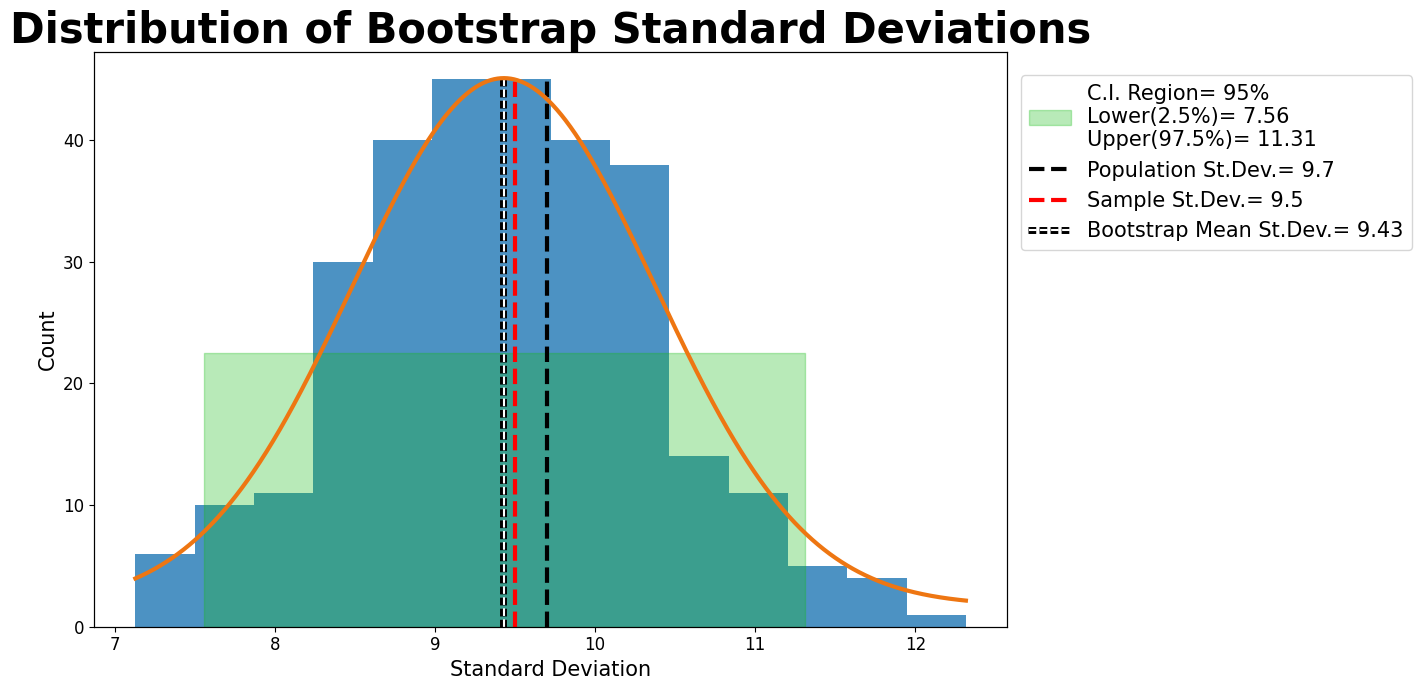

In [7]:
import matplotlib.patheffects as pe

def plot_stdev(data, sample_size, confidence, num_bootstraps):
    pop_stdev = np.std(data)
    sample = np.random.choice(data, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_stdev = np.std(sample, ddof=1)

    boot_stdevs = np.zeros(num_bootstraps)
    upper_bound = 100 - (100 - confidence) / 2
    lower_bound = (100 - confidence) / 2

    for boot_i in range(num_bootstraps):
        boot_stdevs[boot_i] = np.std(np.random.choice(sample, sample_size, replace=True), ddof=1)

    conf_int = np.zeros(2)
    conf_int[0] = np.percentile(boot_stdevs, lower_bound)
    conf_int[1] = np.percentile(boot_stdevs, upper_bound)
    boot_mean_stdev = np.mean(boot_stdevs)

    x = np.linspace(boot_stdevs.min(),boot_stdevs.max(),1001)
    y = stats.norm.pdf(x, loc=np.mean(boot_stdevs), scale=np.std(boot_stdevs))

    fig, ax = plt.subplots(figsize=(10,7))
    path_effect = [pe.withStroke(offset=(-.5,0), linewidth=5, foreground='black')]

    n, bins, patches = ax.hist(boot_stdevs, 'fd', zorder=1, alpha=0.8)
    ax.fill_between(conf_int,0, n.max()/2, color='#16BC16', alpha=0.3, zorder=2,
                    label=f'C.I. Region= {confidence}%\nLower({lower_bound}%)= {np.round(conf_int[0],2)}\nUpper({upper_bound}%)= {np.round(conf_int[1],2)}')
    ax.plot([pop_stdev,pop_stdev,],[0,n.max()], 'k--', linewidth=3, label=f'Population St.Dev.= {np.round(pop_stdev,2)}')
    ax.plot([sample_stdev,sample_stdev,],[0,n.max()], 'r--', linewidth=3, label=f'Sample St.Dev.= {np.round(sample_stdev,2)}')
    ax.plot([boot_mean_stdev,boot_mean_stdev],[0,n.max()], color='w', linewidth=1.5, linestyle='--', label=f'Bootstrap Mean St.Dev.= {np.round(boot_mean_stdev,2)}', path_effects=path_effect)

    ax.set_title('Distribution of Bootstrap Standard Deviations', fontsize=30, fontweight='semibold')
    ax.set_xlabel('Standard Deviation', fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.tick_params(labelsize=12)

    ax2 = ax.twinx()
    ax2.plot(x,y, color='#EE7612', linewidth=3)
    ax2.set_yticks([])

    fig.legend(loc='upper right',bbox_to_anchor=(1,0.9,0.4,0),fontsize=15)
    fig.tight_layout()
    plt.show()


plot_stdev(np.random.normal(loc=2.6,scale=1.7,size=100000)**2, 100, 95, 300)

95% Confidence Interval for the standard deviation: [0.8104002045051512, 1.0967727970070615]


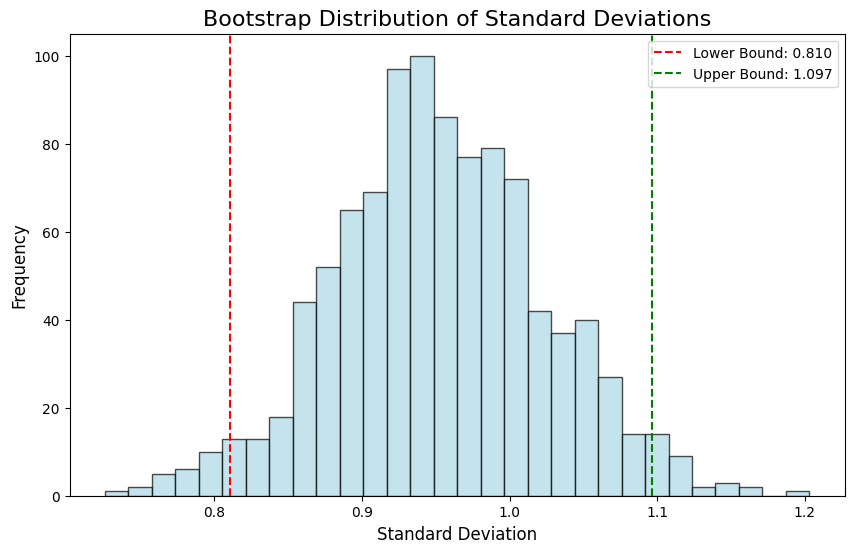

In [10]:
import numpy as np

# Generate some sample data (replace with your data)
data = np.random.randn(100)  # Random data

# Number of bootstrap samples
n_boots = 1000

# Empty list to hold the bootstrapped standard deviations
boot_std_devs = []

# Bootstrap process
for i in range(n_boots):
    # Resample the data with replacement
    sample = np.random.choice(data, size=len(data), replace=True)

    # Compute the sample standard deviation for the resampled data
    boot_std_dev = np.std(sample, ddof=1)  # ddof=1 gives sample standard deviation
    boot_std_devs.append(boot_std_dev)

# Convert the list to a numpy array
boot_std_devs = np.array(boot_std_devs)

# Sort the bootstrapped standard deviations
boot_std_devs.sort()

# Calculate the confidence intervals (95%)
lower_bound = np.percentile(boot_std_devs, 2.5)  # Lower bound (2.5 percentile)
upper_bound = np.percentile(boot_std_devs, 97.5)  # Upper bound (97.5 percentile)

# Report the results
print(f"95% Confidence Interval for the standard deviation: [{lower_bound}, {upper_bound}]")

# Plot the bootstrapped standard deviations
plt.figure(figsize=(10, 6))
plt.hist(boot_std_devs, bins=30, color='lightblue', edgecolor='black', alpha=0.7)

# Add vertical lines for the confidence intervals
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.3f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.3f}')

# Add labels and title
plt.title('Bootstrap Distribution of Standard Deviations', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show the plot
plt.show()